# Clonamos el repositorio para obtener los dataSet

In [ ]:
!git clone https://github.com/joanby/tensorflow.git

# Damos acceso a nuestro Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

# Test it

In [ ]:
!ls '/content/drive/My Drive' 

# Google colab tools

In [1]:
from google.colab import files # Para manejar los archivos y, por ejemplo, exportar a su navegador
import glob # Para manejar los archivos y, por ejemplo, exportar a su navegador
from google.colab import drive # Montar tu Google drive

##Especificando la versión de TensorFlow

Ejecutando "importar tensorflow" importará la versión por defecto (actualmente 2.x). Puedes usar la 1.x ejecutando una celda con la "versión mágica de tensorflow" **antes de ejecutar "importar tensorflow".

### Si no funciona hacer el pip install


In [2]:
#!pip install tensorflow==1.14
%tensorflow_version 1.x

TensorFlow 1.x selected.


# Importar Tensorflow

In [3]:
import tensorflow as tf
print(tf.__version__)
import matplotlib.pyplot as plt

1.15.2


In [4]:
session = tf.Session()

# Regresión Lasso y Ridge

In [17]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets

$$y = Ax + b$$

In [18]:
iris = datasets.load_iris()

In [19]:
x_vals = np.array([x[3] for x in iris.data])
y_vals = np.array([x[0] for x in iris.data])

In [54]:
batch_size = 50
learning_rate = 0.001

In [55]:
x_data = tf.placeholder(shape = [None, 1], dtype=tf.float32)
y_target = tf.placeholder(shape=[None, 1], dtype = tf.float32)
A = tf.Variable(tf.random_normal(shape=[1,1]))
b = tf.Variable(tf.random_normal(shape=[1,1]))
y_pred = tf.add(tf.matmul(x_data, A), b)

$$\sum\frac{(y_r-y_p)^2}{n} \frac{99.0}{1+e^{-100(A-0.9)}}$$

In [56]:
lasso_param = tf.constant(0.9)
heavyside_step = tf.truediv(1.0, tf.add(1.0, tf.exp(tf.multiply(-100.0, tf.subtract(A, lasso_param)))))
regularization_params = tf.multiply(heavyside_step, 99.0)
loss = tf.add(tf.reduce_mean(tf.square(y_target - y_pred)), regularization_params)

In [57]:
init = tf.global_variables_initializer()
session.run(init)

In [58]:
my_optim = tf.train.GradientDescentOptimizer(learning_rate=learning_rate)
train_step = my_optim.minimize(loss)

In [59]:
loss_vec = []
for i in range(2000):
    rand_idx = np.random.choice(len(x_vals), size = batch_size)
    rand_x = np.transpose([x_vals[rand_idx]])
    rand_y = np.transpose([y_vals[rand_idx]])
    session.run(train_step, feed_dict = {x_data: rand_x, y_target: rand_y})
    temp_loss = session.run(loss, feed_dict={x_data: rand_x, y_target: rand_y})
    loss_vec.append(temp_loss[0])
    if(i+1)%100 == 0:
        print("Paso #"+str(i+1)+"A = "+str(session.run(A))+", b = "+str(session.run(b))+
             "Loss: "+str(temp_loss))

Paso #100A = [[0.8329593]], b = [[0.37387386]]Loss: [[21.064001]]
Paso #200A = [[0.82976735]], b = [[1.1841542]]Loss: [[13.508418]]
Paso #300A = [[0.8282176]], b = [[1.8475507]]Loss: [[10.175077]]
Paso #400A = [[0.8253774]], b = [[2.393418]]Loss: [[5.7700033]]
Paso #500A = [[0.82373935]], b = [[2.8382256]]Loss: [[4.087232]]
Paso #600A = [[0.82253945]], b = [[3.2045174]]Loss: [[3.0805383]]
Paso #700A = [[0.8197698]], b = [[3.505182]]Loss: [[2.2970717]]
Paso #800A = [[0.8186082]], b = [[3.752896]]Loss: [[1.8312922]]
Paso #900A = [[0.81750834]], b = [[3.9537292]]Loss: [[1.4096655]]
Paso #1000A = [[0.8138684]], b = [[4.118099]]Loss: [[0.7305082]]
Paso #1100A = [[0.8123454]], b = [[4.2552524]]Loss: [[0.6635394]]
Paso #1200A = [[0.81024915]], b = [[4.3684697]]Loss: [[0.42617893]]
Paso #1300A = [[0.8088029]], b = [[4.460141]]Loss: [[0.5147079]]
Paso #1400A = [[0.8066791]], b = [[4.5343122]]Loss: [[0.4240558]]
Paso #1500A = [[0.8066837]], b = [[4.597366]]Loss: [[0.44809842]]
Paso #1600A = [[0.

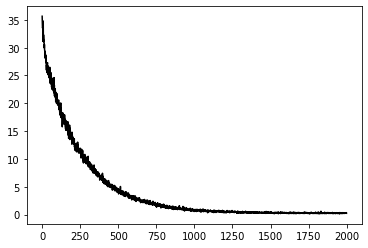

In [60]:
plt.plot(loss_vec, 'k-')

In [61]:
[[slope]] = session.run(A)
[[intercept]] = session.run(b)
print(str(slope) + "x+"+str(intercept))

0.79876506x+4.7805963


In [62]:
best_fit = []
for i in x_vals:
    best_fit.append(slope*i+intercept)

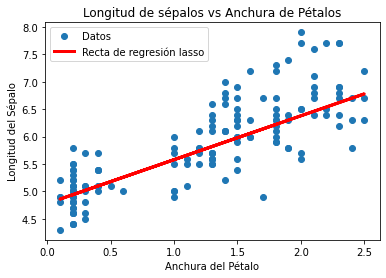

In [63]:
plt.plot(x_vals, y_vals, 'o', label = "Datos")
plt.plot(x_vals, best_fit, 'r-', label="Recta de regresión lasso", linewidth=3)
plt.legend(loc = "upper left")
plt.title("Longitud de sépalos vs Anchura de Pétalos")
plt.xlabel("Anchura del Pétalo")
plt.ylabel("Longitud del Sépalo")
plt.show()

## Ejercicio: Regresión Ridge

$$\sum\frac{(y_r-y_p)^2}{n}+ridge_p\cdot A^2$$

In [64]:
ridge_params = tf.constant(1.0)
ridge_loss = tf.reduce_mean(tf.square(A))
loss = tf.expand_dims(tf.add(tf.reduce_mean(tf.square(y_target-y_pred)), tf.multiply(ridge_params, ridge_loss)),0)